<h1>Batik Nusantara image classification using ResNet50</h1>
<p>Author: HendryHB</p>

<h3>ResNet50</h3>
<p style="text-indent: 25px;">ResNet50 is a popular convolutional neural network architecture that has been extensively used in image recognition tasks. ResNet50, part of the ResNet (Residual Networks) family developed by Microsoft Research, stands out for its innovative use of residual learning, which helps to tackle the vanishing gradient problem often encountered in deep neural networks [1]. A pretrained ResNet50 model has already been trained on a large dataset, such as ImageNet, and can be fine-tuned for specific tasks, making it a powerful tool for researchers and practitioners in the field of computer vision.</p>

<strong>ResNet50 Conceptual</strong>
<p style="text-indent: 25px;">ResNet50 is a 50-layer deep convolutional neural network that introduces residual connections, or shortcuts, which allow the network to learn identity mappings more easily. These residual connections enable the model to add the input of a layer to the output of a few stacked layers, mitigating the vanishing gradient problem and allowing for the training of much deeper networks.</p>

<strong>ResNet50 Components</strong><br>
The key components of the ResNet50 model include:
<ol>
    <li>Convolutional Layers: These layers apply convolution operations to the input, extracting features such as edges, textures, and patterns.</li>
    <li>Batch Normalization: This component normalizes the output of the previous layers, helping to stabilize and accelerate training.</li>
    <li>ReLU Activation Function: The Rectified Linear Unit (ReLU) introduces non-linearity to the network, allowing it to learn complex patterns.</li>
    <li>Residual Blocks: These are the core of ResNet architecture. Each block contains several convolutional layers with a shortcut connection that skips one or more layers.</li>
    <li>Pooling Layers: These layers down-sample the input, reducing its dimensionality and making the computation more efficient</li>
    <li>Fully Connected Layers: At the end of the network, these layers aggregate the extracted features and perform the final classification.</li>
</ol>

<strong>Architecture</strong><br>
<img src="https://github.com/hendryhb/kecakbali/blob/main/resnet50/1.png?raw=true">

<strong>Bibliography</strong><br>
[1]	K. He, X. Zhang, S. Ren, and J. Sun, “Deep Residual Learning for Image Recognition,” 2015, doi: 10.48550/ARXIV.1512.03385.
</p>

In [2]:
from google.colab import drive
import zipfile
import sys
import h5py
import numpy as np
import os
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Activation, GlobalAveragePooling2D

from keras.utils import to_categorical
from keras.models import load_model
from keras.preprocessing.image import array_to_img

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score

%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(42)

## Load Data

In [3]:
drive.mount('/content/drive')

In [4]:
with zipfile.ZipFile("/content/drive/MyDrive/raw_batik_v2.1.zip") as zip_ref:
  zip_ref.extractall("./")

# Constants

In [4]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
BATCH_SIZE = 32

<h1>Pure Inference Using Pre-trained ResNet50</h1>
<p style="text-indent: 25px;"><strong>Inference</strong> is the process of making predictions or generating outputs based on new or unseen data by utilizing a pre-trained model as-is, without any additional training. In this case, ResNet50, which has been trained on large datasets like ImageNet, is used with its pre-trained weights.</p>

## Load the pre-trained ResNet50 model and higher level layers

In [7]:
model = tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=True)

<h2>Create a data generator for the inference data.</h2>
<p style="text-indent: 25px;">Since the dataset is divided into <code>training and testing</code> sets, let's use the train dataset. Alternatively, feel free to combine both folders into one and rename it as desired.</p>

In [18]:
# Data generator for inference
inference_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Assuming images for inference are in a directory "train" within DATA_DIR
inference_generator = inference_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, "train"),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode=None,  
    batch_size=BATCH_SIZE,
    shuffle=False  
)

Found 640 images belonging to 20 classes.


# Predict on the inference data

In [19]:
predictions = model.predict(inference_generator, verbose=1)

20/20 [==============================] - 69s 3s/step


<h2>Post-processing the Output</h2>
<p><code>decode_predictions</code> translates the model's raw output into human-readable class labels and probabilities</p>

In [20]:
decoded_predictions = decode_predictions(predictions, top=1)

# Print the predictions
for i, pred in enumerate(decoded_predictions):
    print(f"Image {i + 1}: {pred}")

Image 1: [('n03000247', 'chain_mail', 0.15763655)]
Image 2: [('n03485794', 'handkerchief', 0.3883182)]
Image 3: [('n03998194', 'prayer_rug', 0.7361719)]
Image 4: [('n03998194', 'prayer_rug', 0.93572474)]
Image 5: [('n03998194', 'prayer_rug', 0.24916555)]
Image 6: [('n04209239', 'shower_curtain', 0.3684207)]
Image 7: [('n03998194', 'prayer_rug', 0.07919145)]
Image 8: [('n03485794', 'handkerchief', 0.39850062)]
Image 9: [('n03998194', 'prayer_rug', 0.3569655)]
Image 10: [('n03998194', 'prayer_rug', 0.09079631)]
Image 11: [('n04209239', 'shower_curtain', 0.37523687)]
Image 12: [('n04525038', 'velvet', 0.106945105)]
Image 13: [('n03998194', 'prayer_rug', 0.21089545)]
Image 14: [('n03998194', 'prayer_rug', 0.9373022)]
Image 15: [('n04532106', 'vestment', 0.27653846)]
Image 16: [('n03998194', 'prayer_rug', 0.07197177)]
Image 17: [('n04136333', 'sarong', 0.7761927)]
Image 18: [('n04525038', 'velvet', 0.6015029)]
Image 19: [('n03998194', 'prayer_rug', 0.21185066)]
Image 20: [('n03998194', 'pra

<br><strong>Understanding the Output</strong><br>
<p style="text-indent: 25px;">The output from the <code>decode_predictions</code> function is based on the ImageNet dataset, which includes 1,000 different classes representing a wide variety of general image categories, such as everyday objects like cars, planes, bananas, basketballs, sarongs, and shower curtains. However, if using an inference pre-trained model with specific dataset like Batik Nusantara images and custom labels, <code>decode_predictions</code> will not work correctly because it relies on the ImageNet class indices and labels.</p>
<p style="text-indent: 25px;">To get meaningful predictions for specific classes like 'Bali_Barong' or 'Papua_Cendrawasih,' it is advisable to use a custom pre-trained model and layers trained on the Batik Nusantara dataset. This approach will enable the model to make predictions relevant to these specific classes.</p>

# Pre-trained ResNet50 Model and custom model

## Load Data - If this is done, skip this step

In [3]:
drive.mount('/content/drive')

In [4]:
with zipfile.ZipFile("/content/drive/MyDrive/raw_batik_v2.1.zip") as zip_ref:
  zip_ref.extractall("./")

## Constants - If this is done, skip this step

In [3]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
BATCH_SIZE = 32

## Data gathering using DataGenerator

In [5]:
common_datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='constant',
    preprocessing_function=preprocess_input)

train_generator = common_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, "train"),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=os.path.join(DATA_DIR, "test"),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb', # Set color mode to RGB
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 640 images belonging to 20 classes.
Found 160 images belonging to 20 classes.


<h2>Load ResNet50 model without top layer and Compile</h2>
<p>Please note that the modeling used here is simple, and further customization is encouraged.</p>

In [26]:
base_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet',
                                                     include_top=False,
                                                     input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, COLOR_CHANNELS))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Create the full model
model_1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<h2>Train the Model</h2>
<p>Please note that the training strategy used here is simple, and further customization is encouraged.</p>
<p><strong>Uncomment below to run training process</strong></p>

In [1]:
# EPOCHS = 25

# model_1.fit(train_generator,
#                       batch_size=BATCH_SIZE, verbose=1,
#                       epochs=EPOCHS, 
#                       validation_data=test_generator)

<h2>Load Weights Data</h2> 
<p style="text-indent: 25px;">To expedite the process, the ResNet50 model has already been pre-trained, allowing to simply load the pre-trained weights instead of running the training again, which saves time. <strong>Skip this step and proceed to the evaluation and prediction after training the model</strong></p>

<h2>Load ResNet50 Model without top layer and Compile - If this is done, skip this step</h2>
<p>Please note that the modeling used here is simple, and further customization is encouraged.</p>

In [6]:
base_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet',
                                                     include_top=False,
                                                     input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, COLOR_CHANNELS))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Create the full model
model_1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Load pre-trained weights¶

In [7]:
# Load pre-trained weights
model_1.load_weights('/content/drive/MyDrive/resnet50_batik_nusantara_weights.h5')

# Evaluation

In [8]:
test_loss, test_accuracy = model_1.evaluate(test_generator)
print(f"Test loss : {test_loss:0.3} and the test accuracy: {test_accuracy:0.2%}")

5/5 [==============================] - 142s 27s/step - loss: 0.1148 - accuracy: 0.9937
Test loss : 0.115 and the test accuracy: 99.37%


# Predict the classes

In [9]:
predictions = model_1.predict(test_generator)

5/5 [==============================] - 139s 26s/step


## Get class labels and Prediction class, labels and confidences

In [10]:
# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get the true class indices
true_class_indices = test_generator.classes

# Get the predicted class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# Map predicted class indices to the actual class labels
predicted_labels = [class_labels[idx] for idx in predicted_class_indices]

# Calculate the prediction confidence for each image
prediction_confidences = np.max(predictions, axis=1)

<h3>10 Lowest Predicted Images</h3> 
<p style="text-indent: 25px;">Displaying the lowest 10 predictions is more insightful than the highest predictions when using loaded pre-trained weights. However, if the model is trained from scratch, examining the highest predictions would also be valuable.</p>

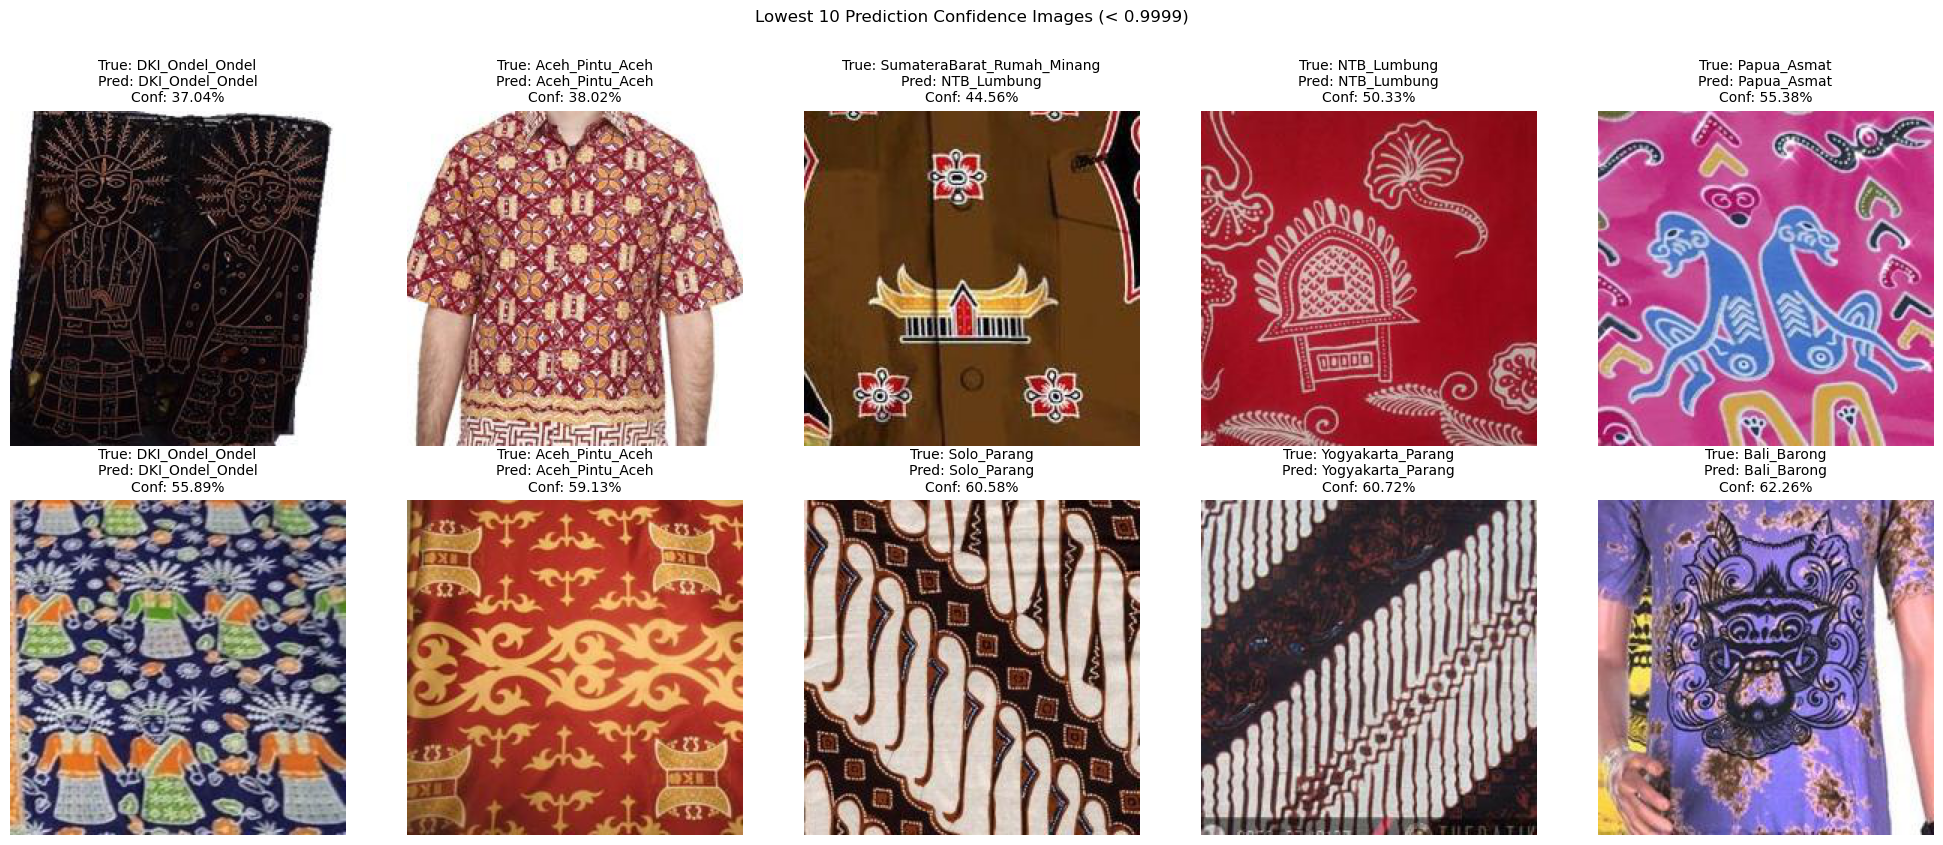

In [18]:
low_conf_indices = np.where(prediction_confidences < 0.9999)[0]
lowest_10_indices = np.argsort(prediction_confidences[low_conf_indices])[:10]

# Define the number of images to plot per row
images_per_row = 5

# Create a subplot grid to plot the images
fig, axes = plt.subplots(2, images_per_row, figsize=(20, 8))  

for i, idx in enumerate(low_conf_indices[lowest_10_indices]):
    img_path = test_generator.filepaths[idx]
    true_label = class_labels[true_class_indices[idx]]
    predicted_label = predicted_labels[idx]
    confidence = prediction_confidences[idx] * 100
    
    img = plt.imread(img_path)
    ax = axes[i // images_per_row, i % images_per_row]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"True: {true_label}\nPred: {predicted_label}\nConf: {confidence:.2f}%", fontsize=10)

plt.tight_layout()
plt.suptitle('Lowest 10 Prediction Confidence Images (< 0.9999)', y=1.05)
plt.show()

# Confusion Matrix and Classification Report

<h3>Calculate <code>y_true</code> and <code>y_pred</code></h3>
<p><code>y_true</code>, retrieves the true class labels of the test images, while <code>y_pred</code> determines the predicted class labels by selecting the class with the highest probability for each image.</p>

In [13]:
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

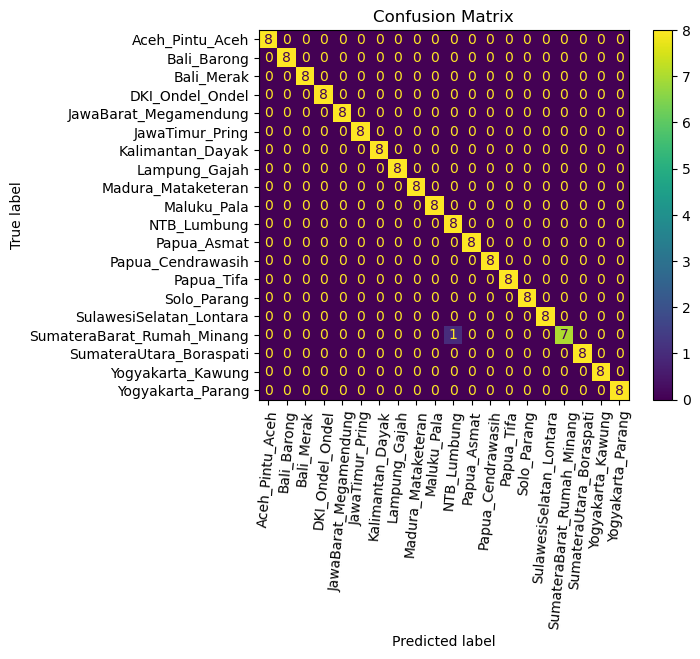

In [26]:
# Confusion Matrix Display
conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)

disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.xticks(rotation=85)
plt.show()

In [27]:
class_report = classification_report(y_true, y_pred, target_names=class_labels)
print('Classification Report')
print(class_report)

Classification Report
                            precision    recall  f1-score   support

           Aceh_Pintu_Aceh       1.00      1.00      1.00         8
               Bali_Barong       1.00      1.00      1.00         8
                Bali_Merak       1.00      1.00      1.00         8
           DKI_Ondel_Ondel       1.00      1.00      1.00         8
     JawaBarat_Megamendung       1.00      1.00      1.00         8
           JawaTimur_Pring       1.00      1.00      1.00         8
          Kalimantan_Dayak       1.00      1.00      1.00         8
             Lampung_Gajah       1.00      1.00      1.00         8
        Madura_Mataketeran       1.00      1.00      1.00         8
               Maluku_Pala       1.00      1.00      1.00         8
               NTB_Lumbung       0.89      1.00      0.94         8
               Papua_Asmat       1.00      1.00      1.00         8
         Papua_Cendrawasih       1.00      1.00      1.00         8
                Papua_Tif

<h1>Summary and Conclusion</h1>
<p style="text-indent: 25px;">This evaluation was conducted using previously trained weights, suggesting the model had been trained (which implies the model has already been fine-tuned during its prior training sessions) and then loaded for further evaluation. The model correctly classified 99.37% of the test samples, indicating very high accuracy. However, from the 10 lowest image shows that this variation suggests that while the model is generally accurate, it may not always be highly confident in its predictions, especially for certain classes or samples.</p>
<p style="text-indent: 25px;">The high accuracy and performance metrics suggest the model may be overfitting, especially since these results are based on pre-trained weights. Further evaluation with a more diverse and challenging test set is recommended to ensure robustness and generalizability. In general, the ResNet50-based model demonstrates excellent performance on the test set, with very high accuracy and performance metrics. However, the variation in prediction confidences and the use of pre-trained weights suggest further evaluation and potential fine-tuning may be necessary to confirm its robustness and generalizability.</p>

<strong>Potential Adjustments</strong><br>
<p style="text-indent: 25px;">To further improve ResNet50 model's performance, particularly for classes with lower confidence or recall, consider the following adjustments:</p>
<ol>
    <li>Increase Data Augmentation: Utilize a more aggressive dataset strategy and augmentation as outlined in the data card instructions to achieve deeper and more comprehensive performance, mitigating potential overfitting and ensuring the model performs well on unseen data.</li>
    <li>Conduct additional evaluations using cross-validation or a more varied test set to confirm the model's robustness and generalizability.</li>
    <li>Model Tuning: Experiment with model's architecture fine-tuning, hyperparameters, and training strategies.</li>
</ol>
<p style="text-indent: 25px;">ResNet50 is a powerful convolutional neural network architecture designed to facilitate the training of deep networks through the use of residual connections. Its ability to leverage pretrained weights on large datasets like ImageNet makes it a valuable tool for transfer learning in a variety of image recognition tasks. While it offers significant advantages in terms of depth and training efficiency, its computational demands and complexity must be carefully managed. Proper implementation and fine-tuning can yield highly effective models suitable for a range of applications in computer vision.</p>

#### -------End of Kernel------------

<h4><em>Should you find this kernel helpful, an upvote (&#x25B2;) would be greatly appreciated.</em></h4>